In [ ]:
from color_palette import PaletteCreator

import cv2
import numpy as np
import pandas as pd
import os

In [ ]:
pc = PaletteCreator(4)

In [ ]:
data_root = './images/dataset'
seasons = ['spring', 'summer', 'fall', 'winter']

In [ ]:
def bgr2cmyk(bgr):
    res_cmyk = []
    bgr = bgr / 255.0
    
    for i in range(len(bgr)):
        b, g, r = bgr[i]
        k = 1 - max(r, g, b)
        c = (1 - r - k) / (1 - k) * 255
        m = (1 - g - k) / (1 - k) * 255
        y = (1 - b - k) / (1 - k) * 255

        tmp = np.array([c, m, y, k])
        res_cmyk.append(tmp)
        
    return np.array(res_cmyk)

/Users/sun/Senior-project/personal-color/color_palette.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, len(mean_colors), figsize=(self.n_colors, 1))


spring: 97 rows
summer: 108 rows
fall: 103 rows
winter: 94 rows


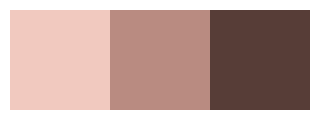

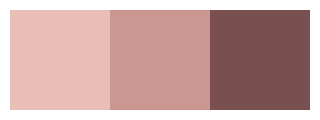

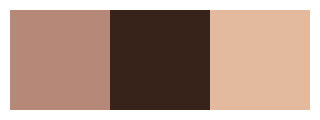

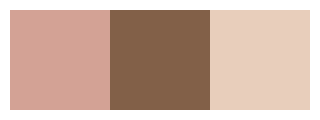

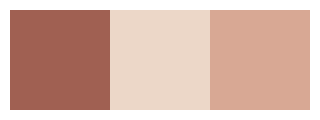

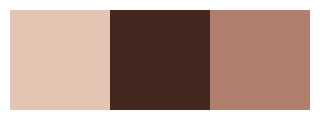

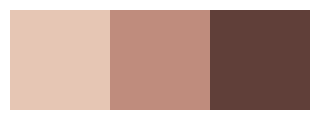

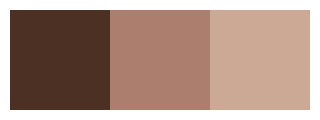

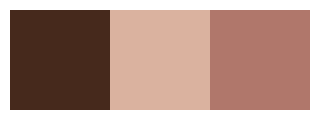

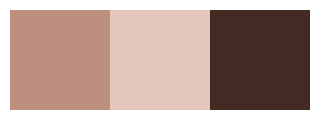

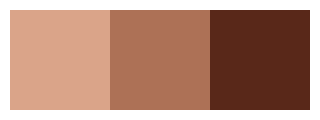

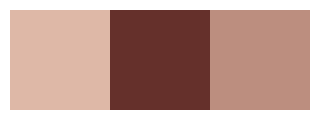

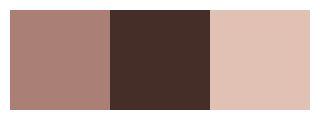

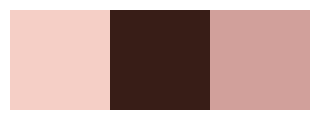

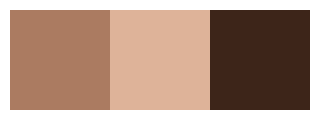

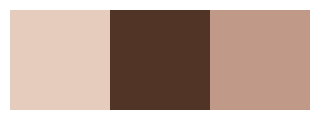

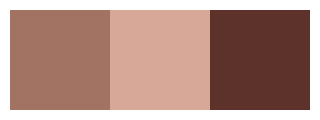

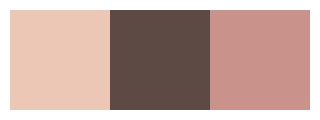

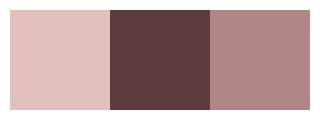

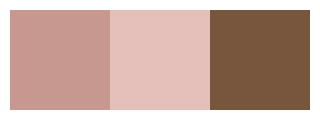

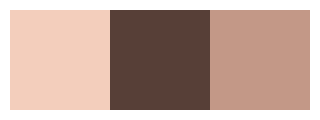

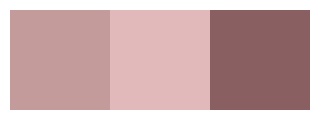

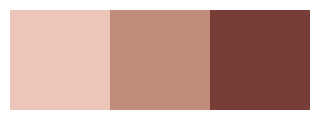

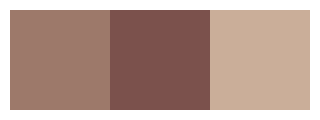

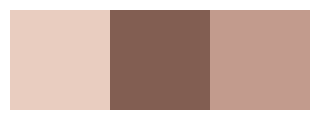

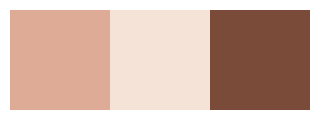

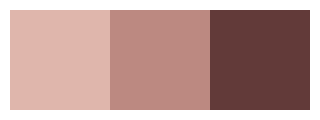

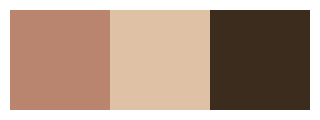

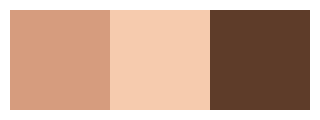

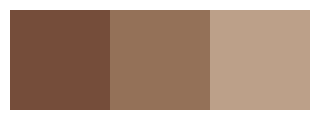

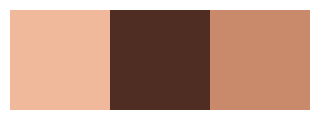

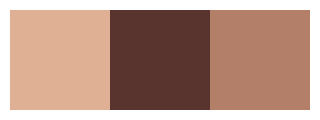

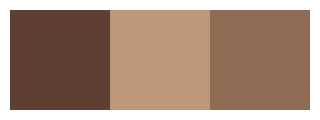

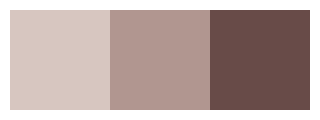

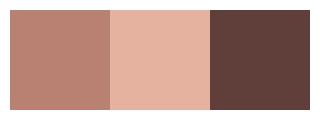

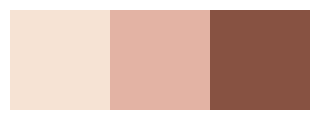

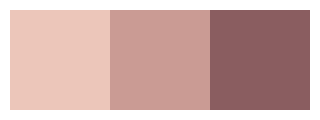

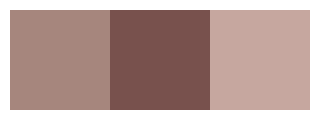

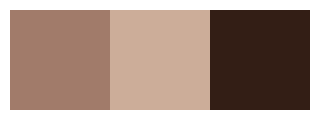

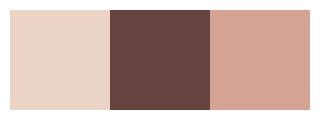

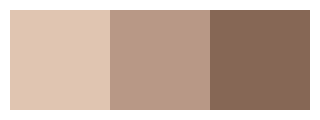

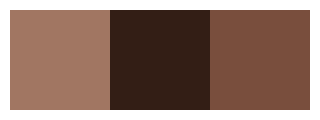

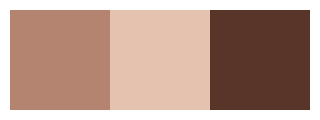

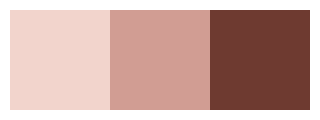

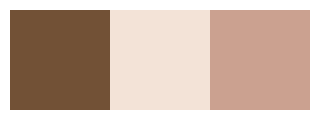

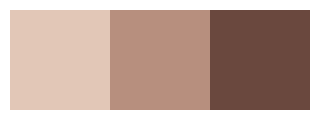

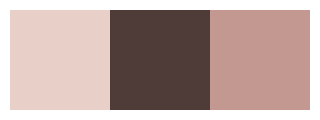

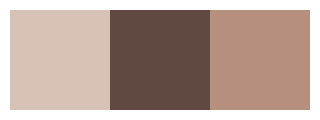

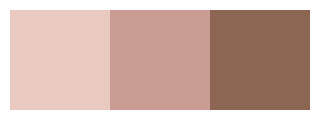

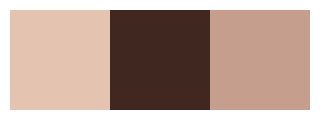

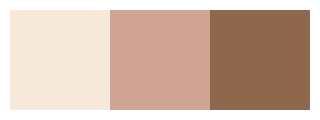

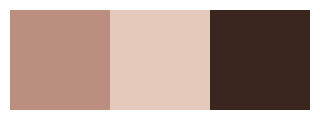

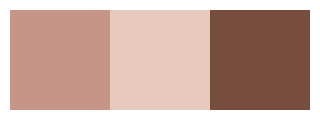

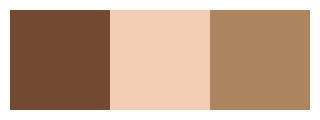

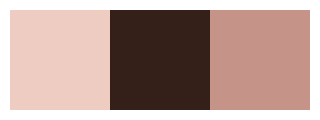

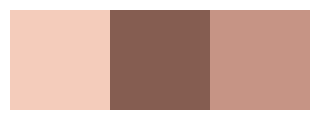

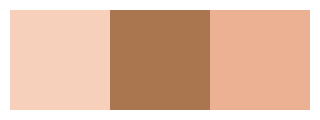

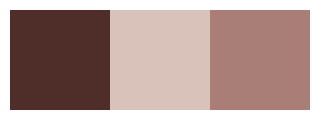

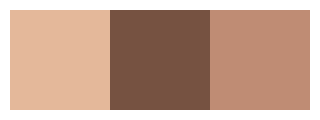

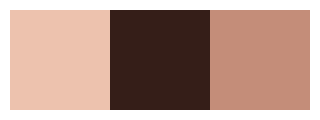

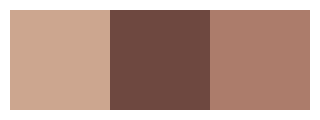

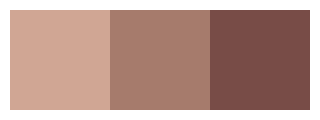

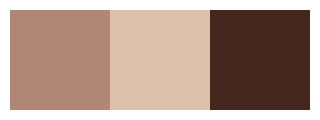

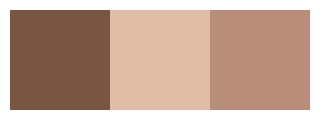

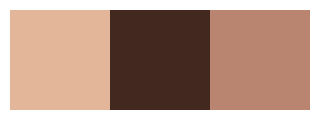

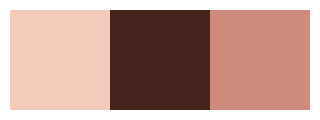

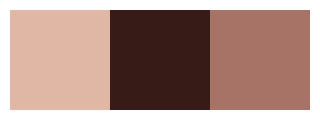

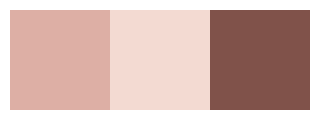

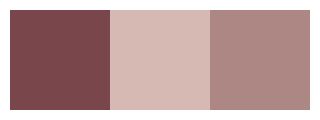

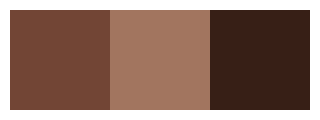

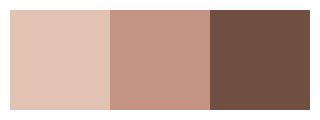

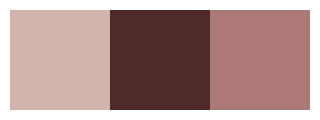

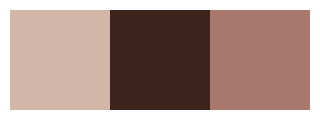

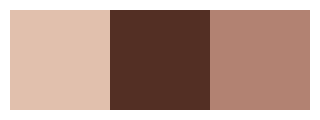

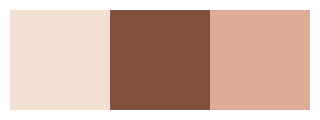

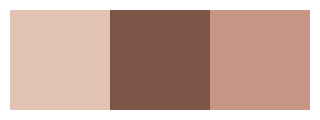

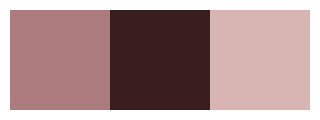

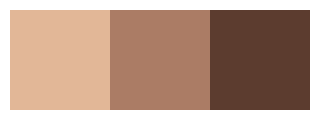

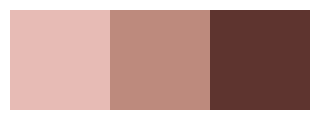

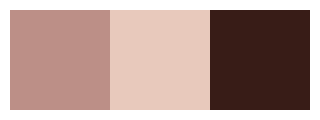

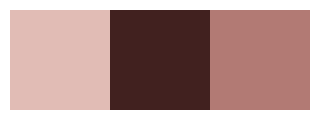

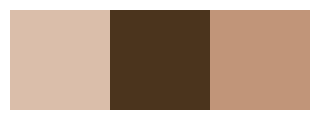

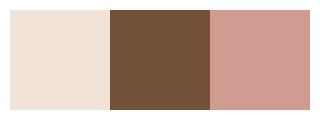

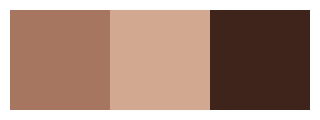

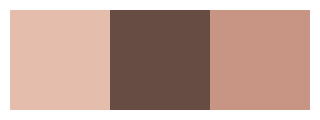

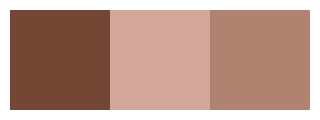

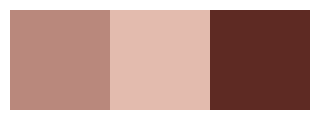

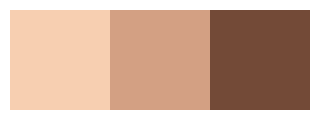

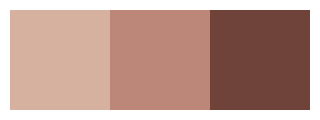

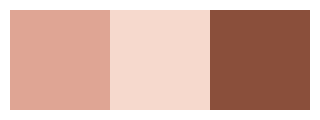

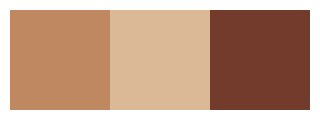

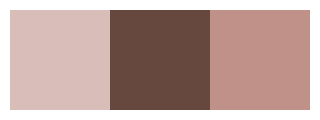

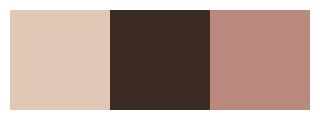

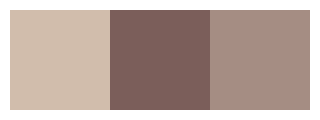

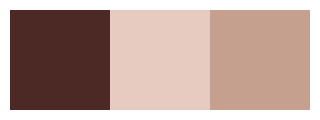

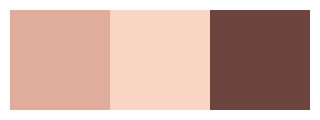

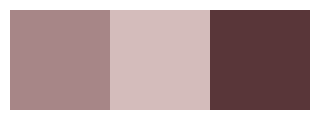

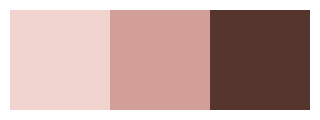

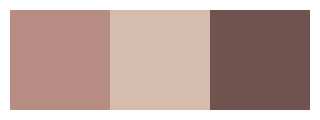

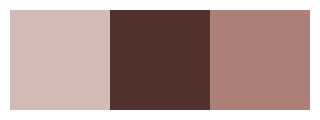

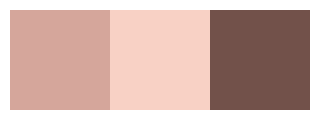

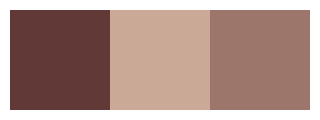

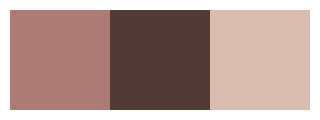

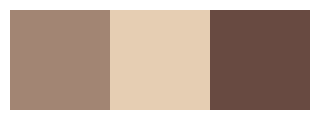

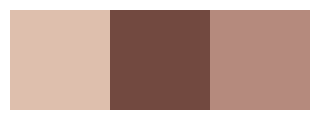

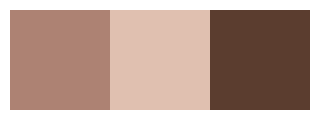

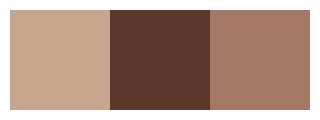

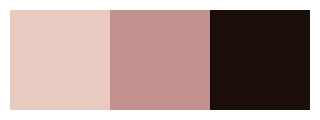

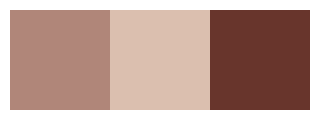

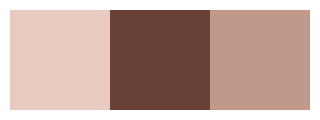

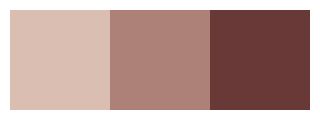

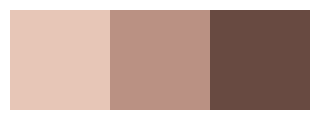

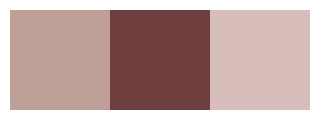

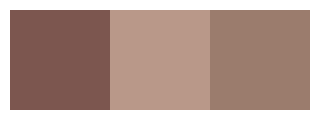

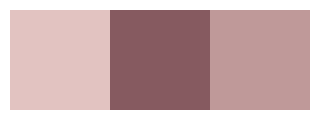

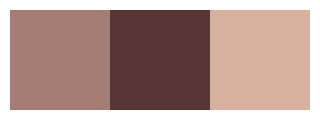

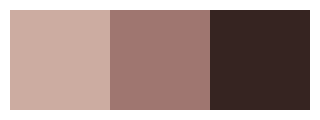

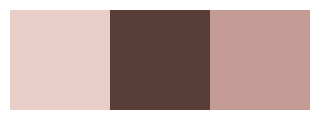

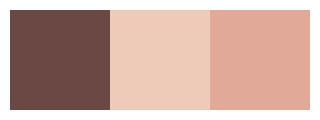

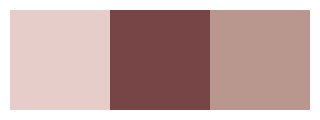

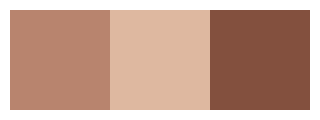

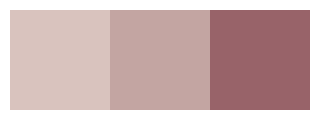

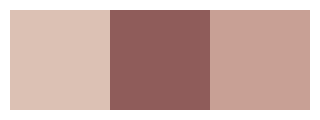

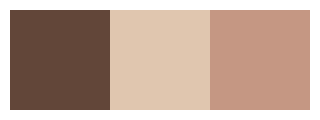

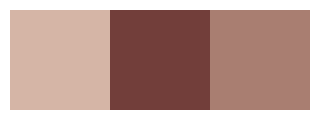

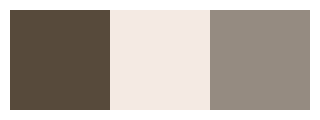

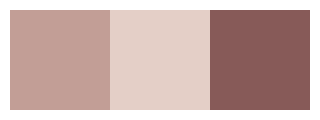

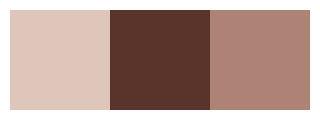

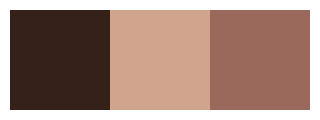

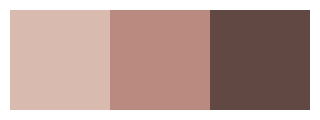

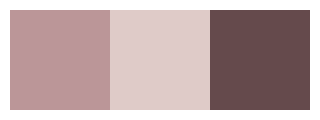

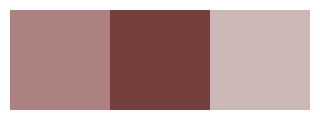

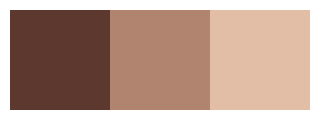

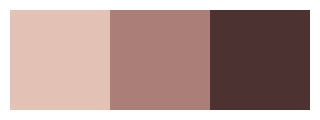

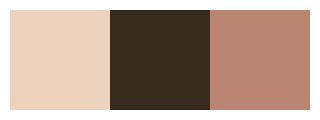

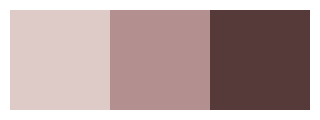

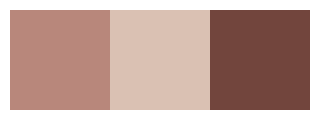

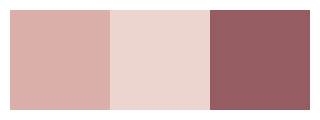

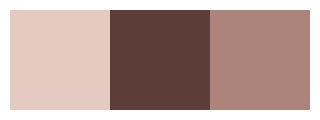

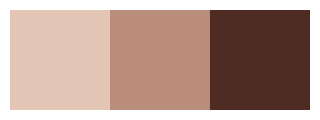

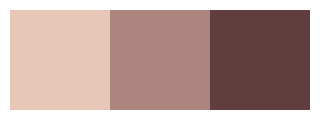

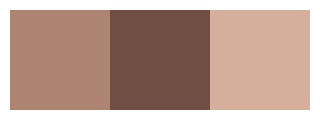

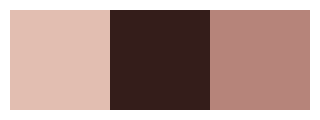

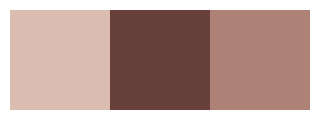

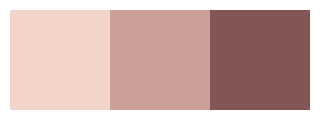

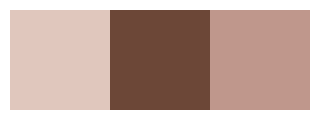

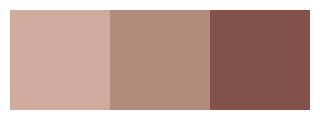

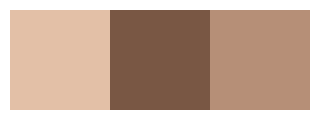

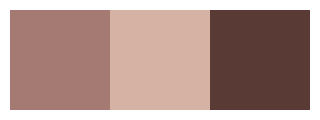

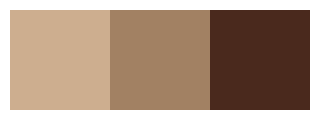

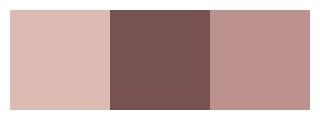

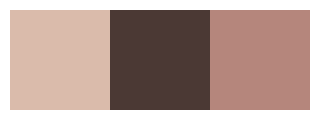

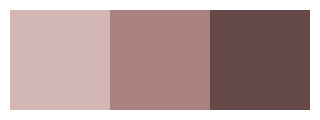

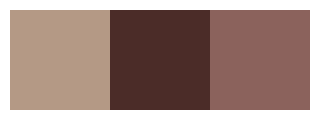

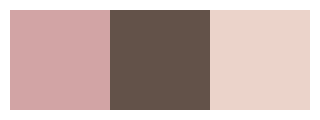

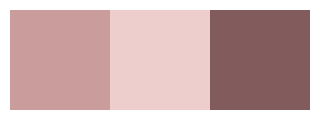

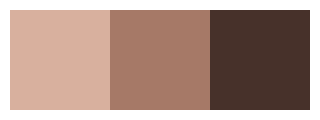

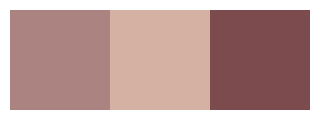

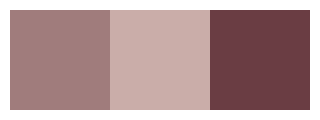

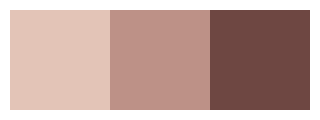

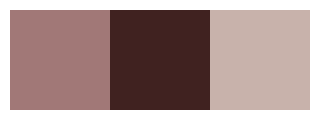

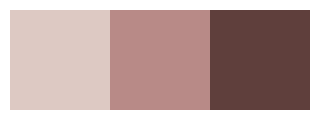

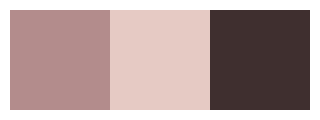

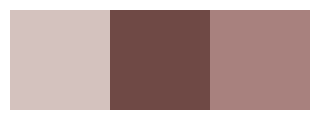

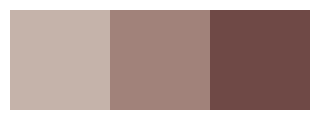

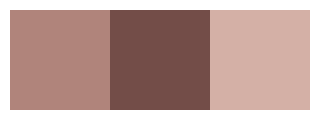

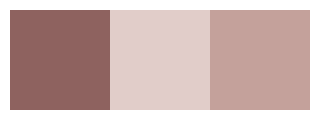

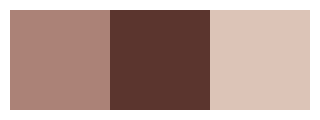

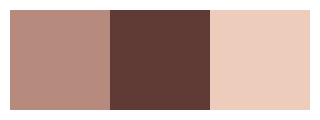

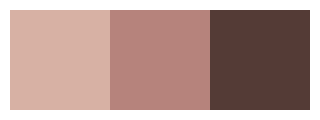

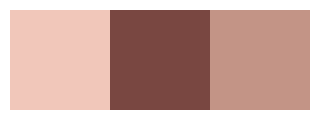

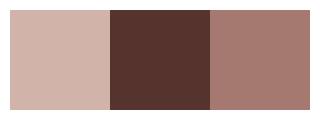

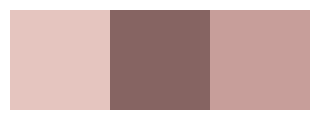

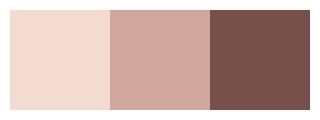

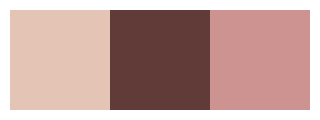

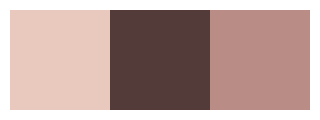

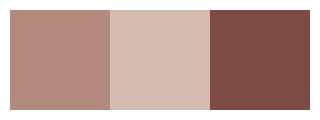

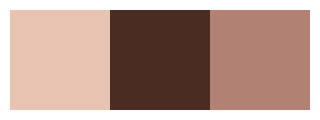

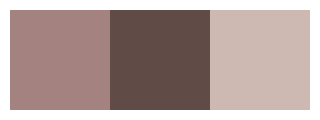

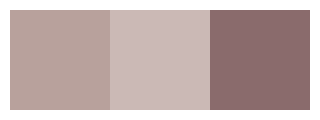

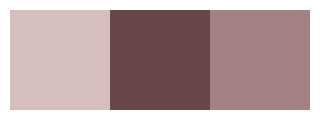

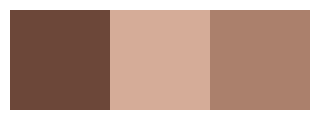

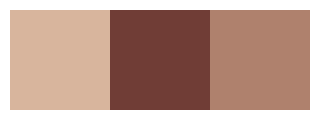

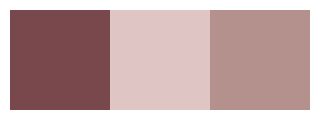

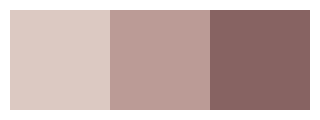

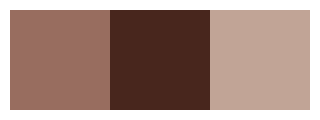

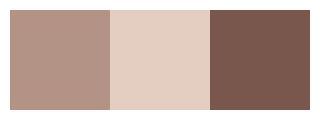

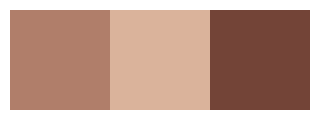

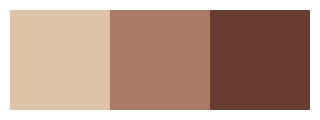

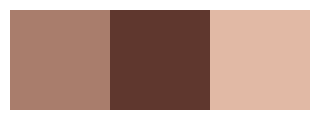

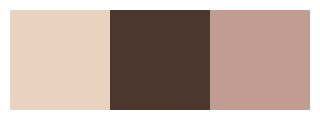

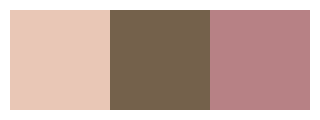

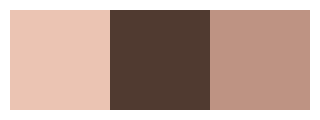

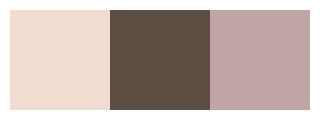

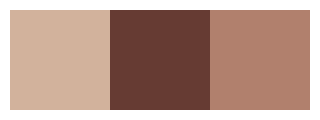

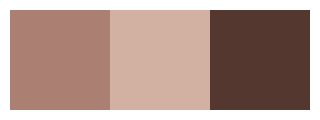

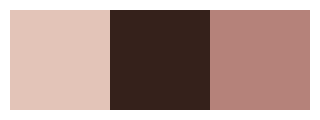

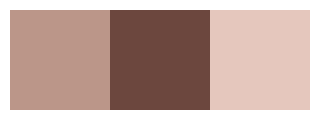

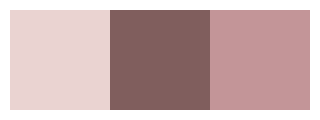

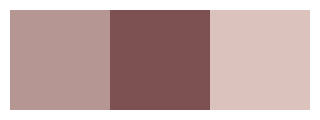

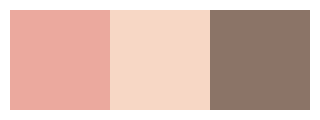

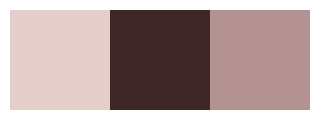

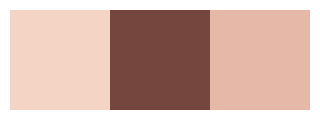

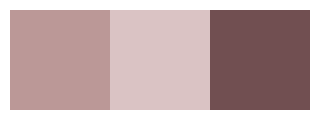

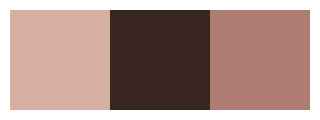

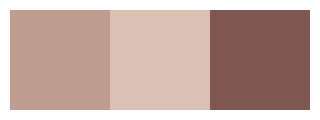

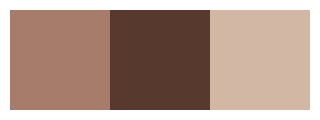

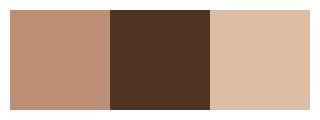

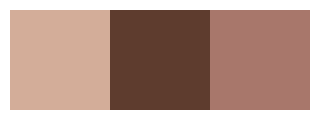

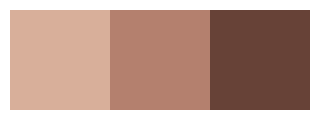

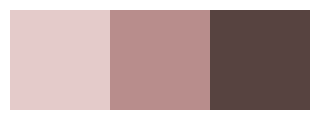

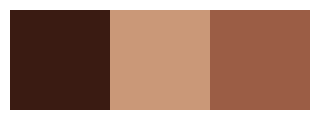

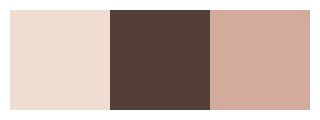

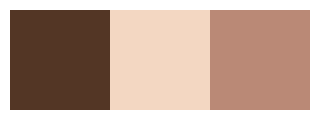

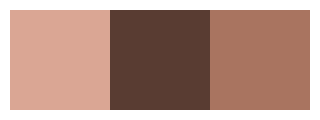

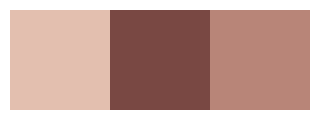

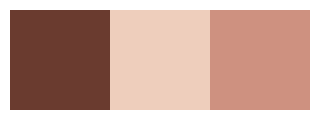

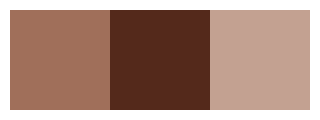

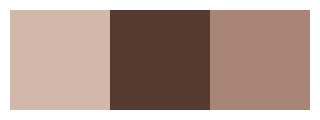

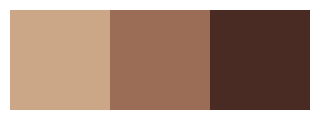

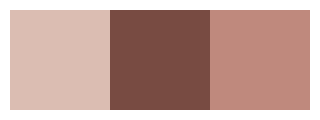

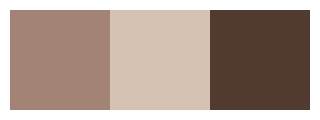

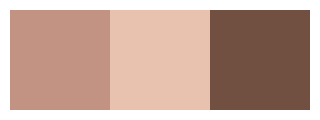

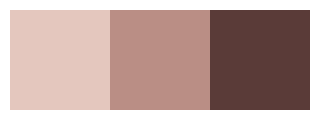

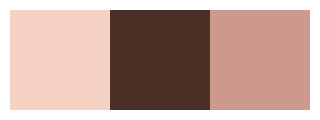

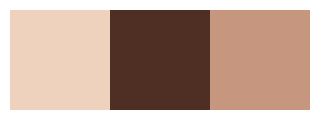

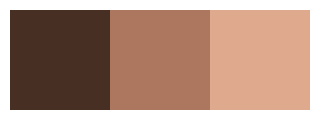

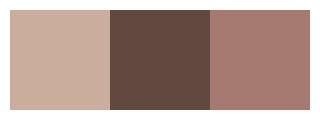

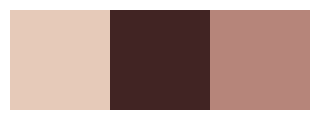

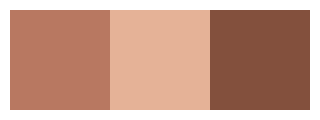

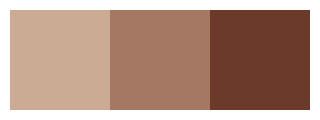

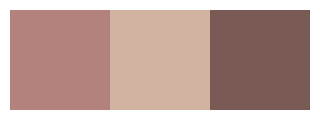

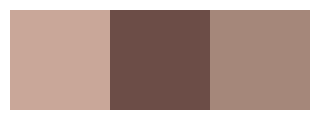

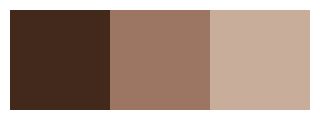

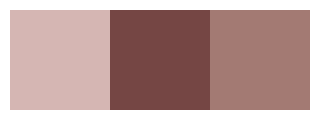

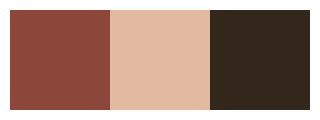

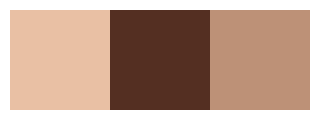

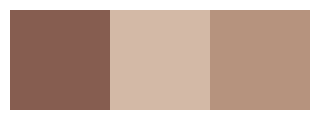

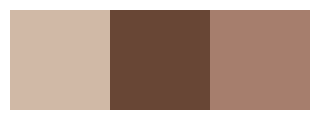

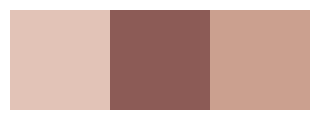

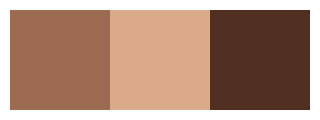

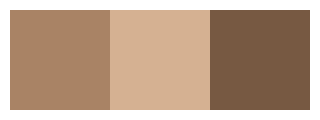

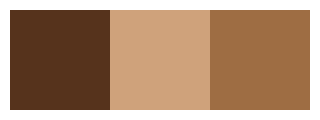

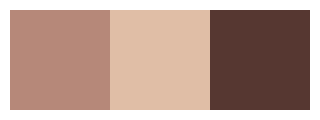

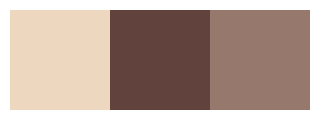

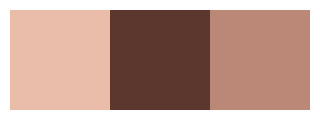

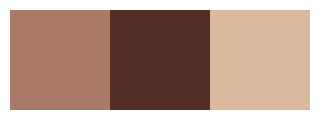

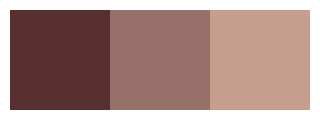

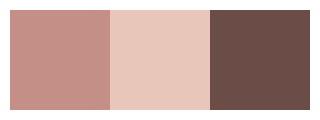

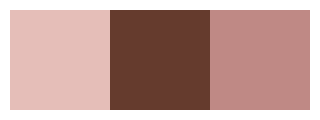

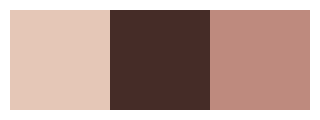

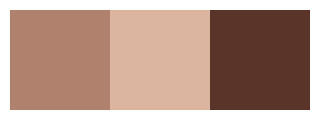

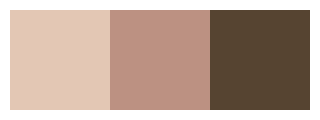

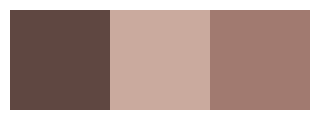

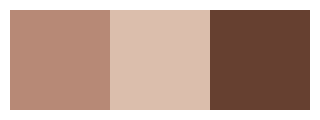

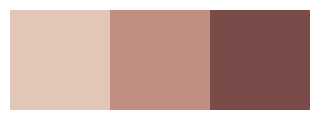

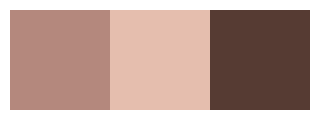

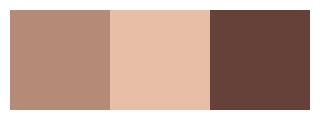

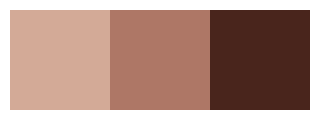

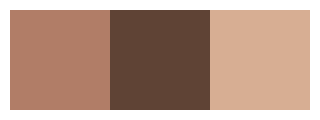

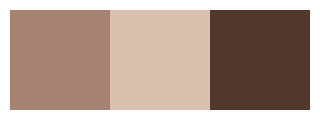

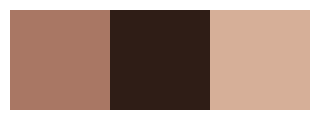

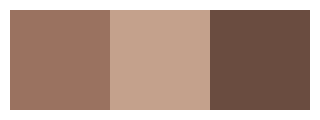

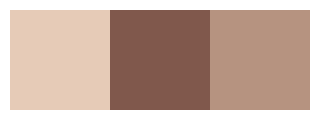

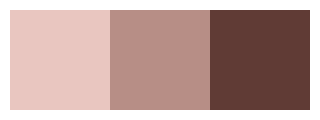

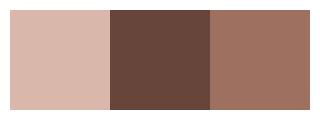

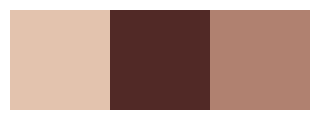

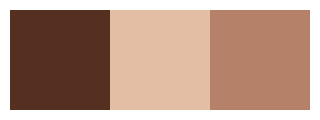

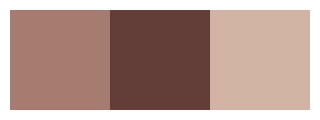

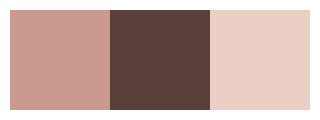

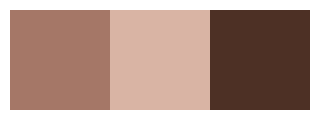

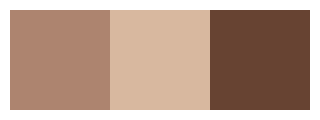

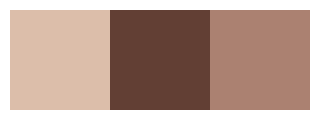

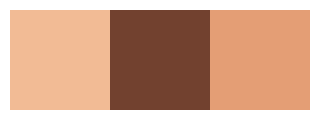

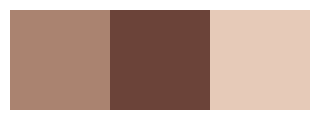

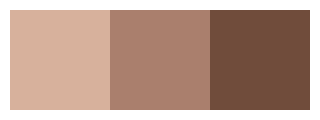

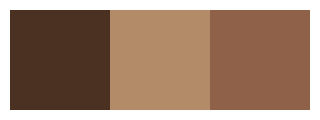

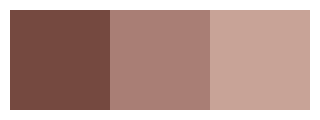

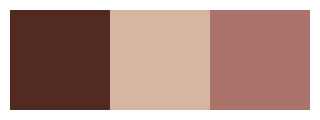

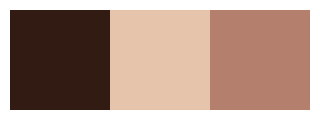

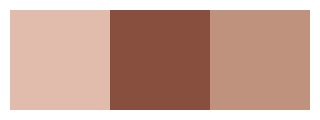

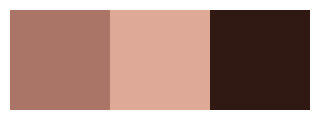

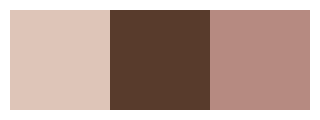

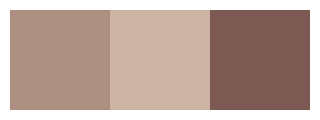

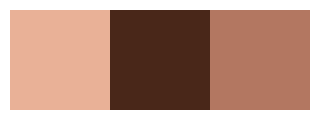

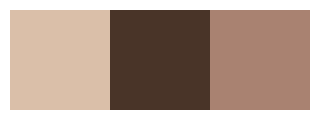

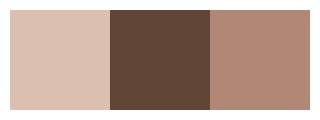

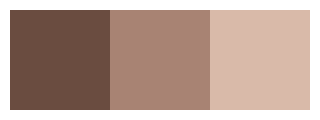

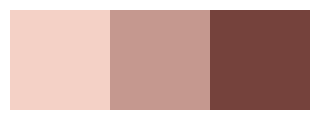

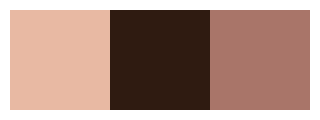

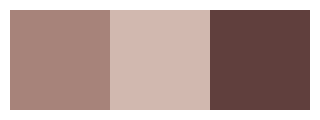

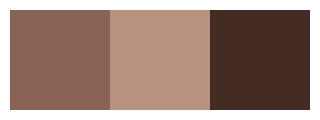

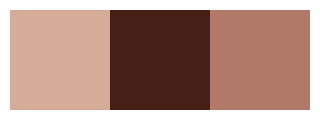

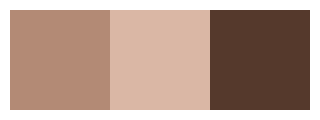

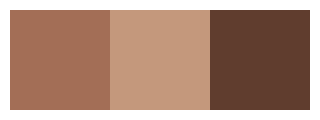

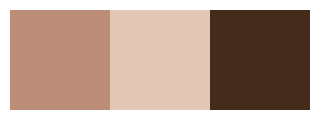

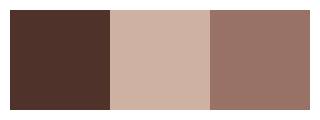

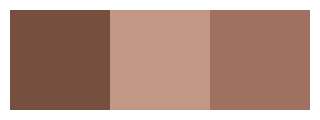

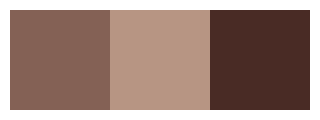

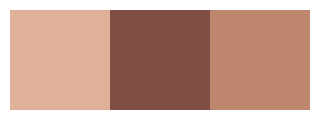

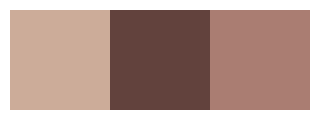

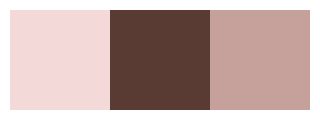

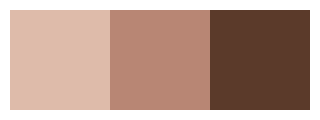

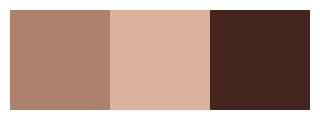

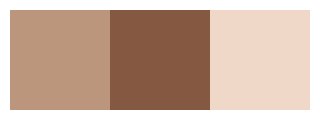

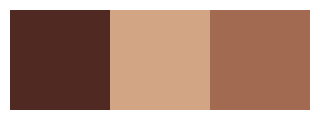

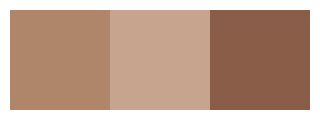

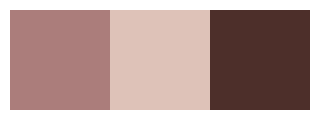

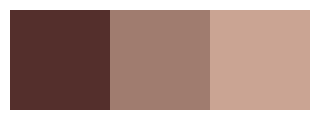

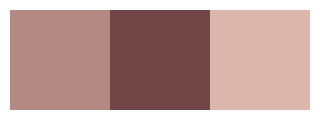

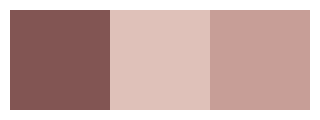

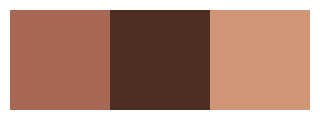

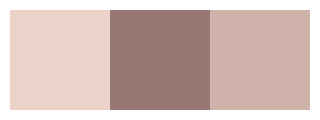

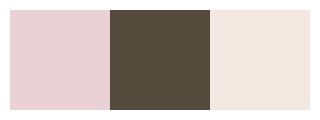

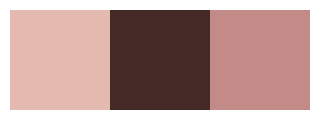

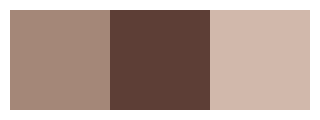

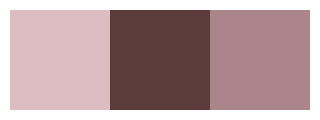

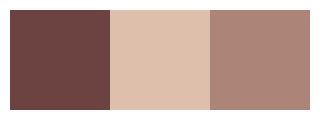

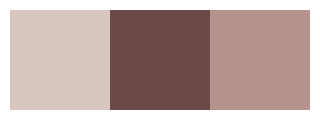

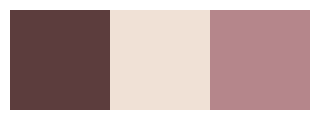

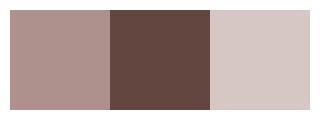

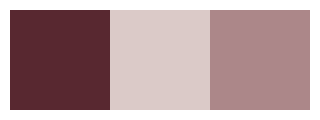

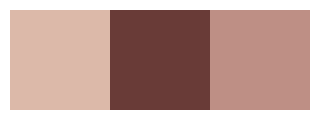

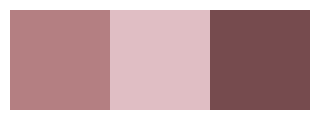

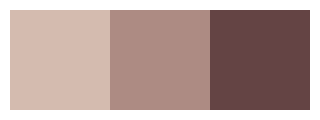

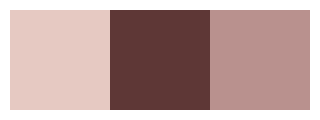

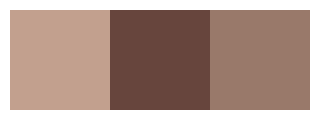

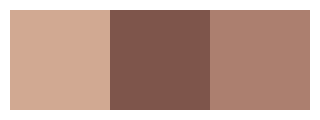

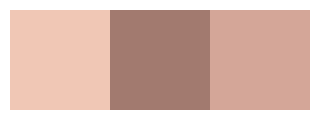

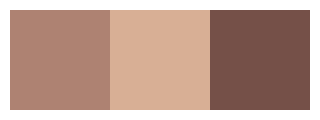

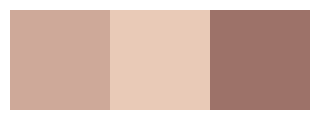

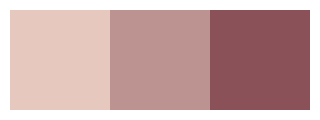

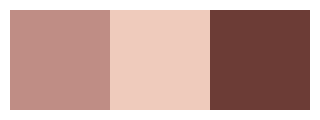

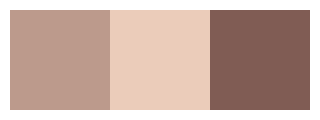

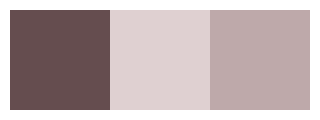

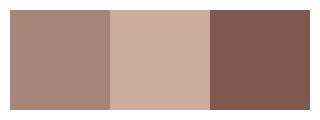

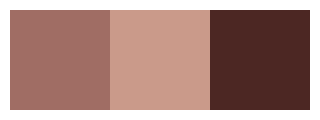

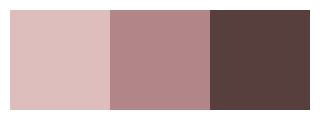

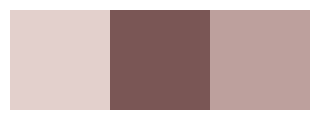

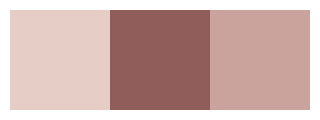

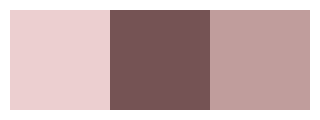

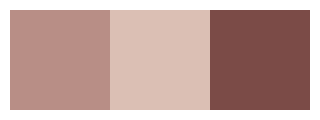

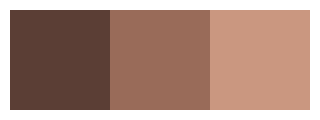

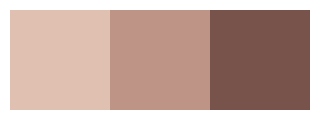

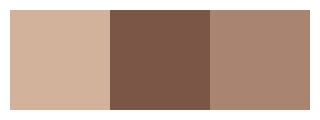

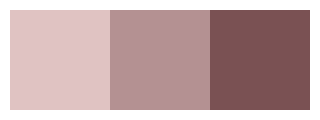

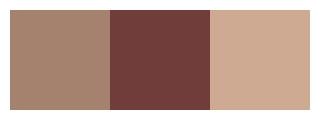

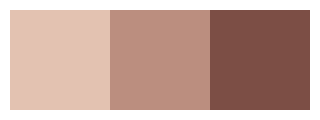

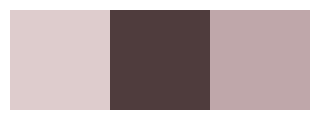

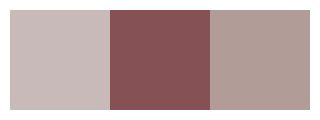

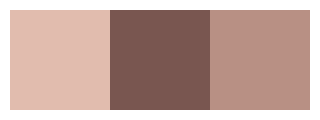

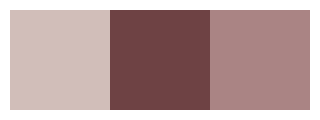

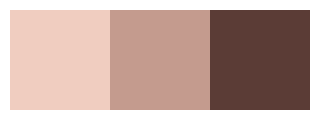

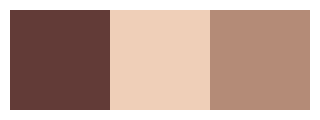

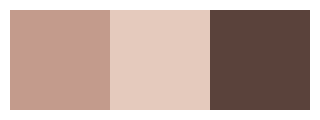

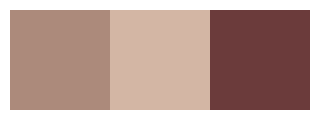

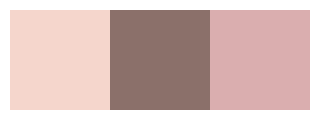

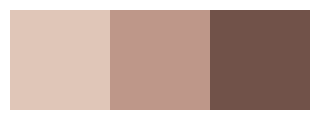

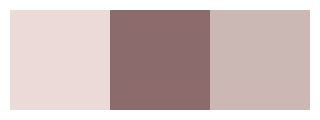

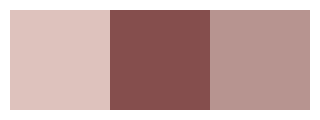

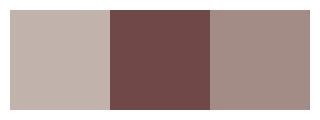

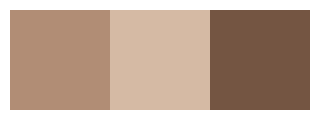

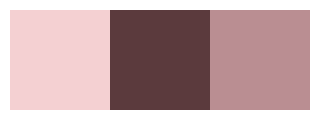

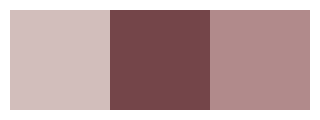

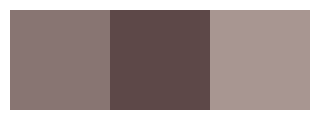

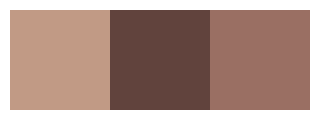

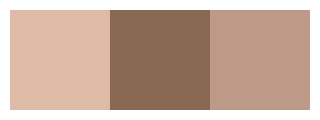

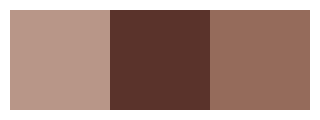

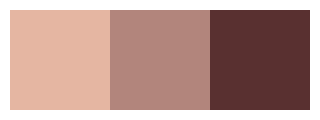

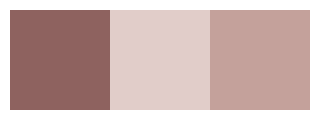

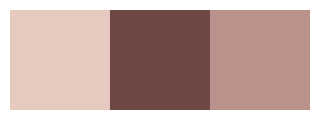

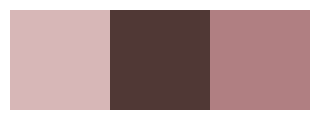

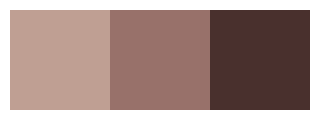

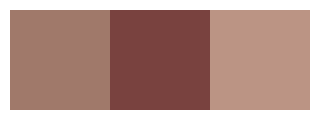

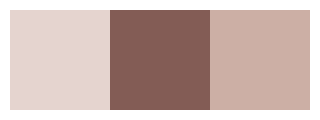

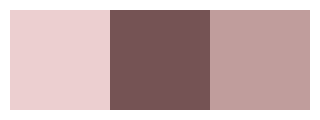

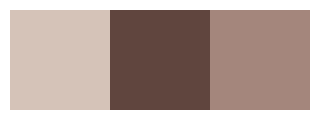

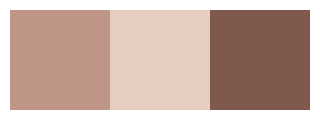

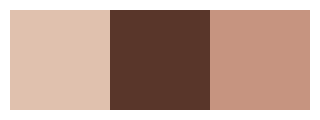

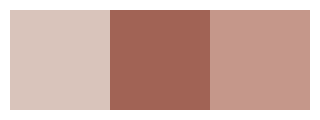

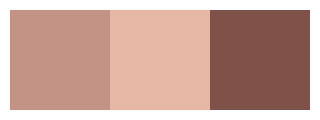

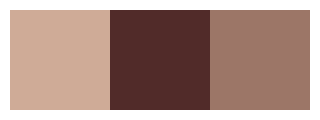

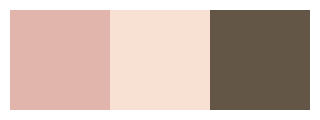

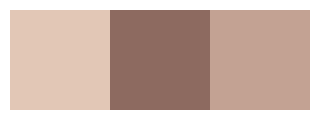

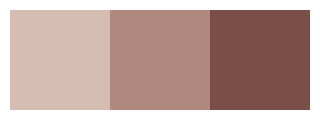

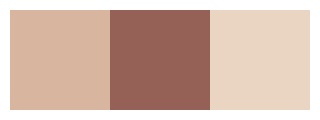

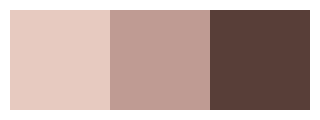

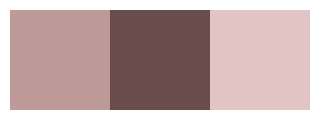

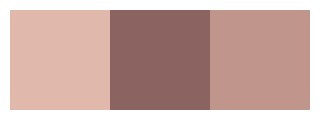

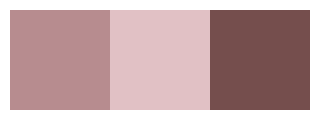

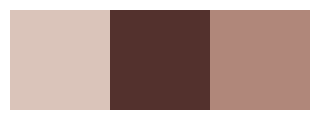

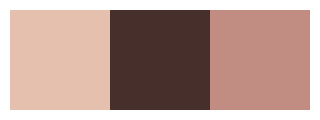

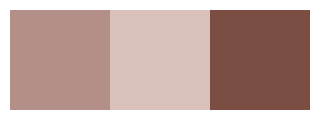

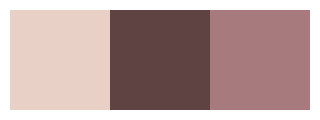

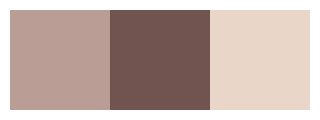

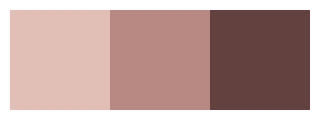

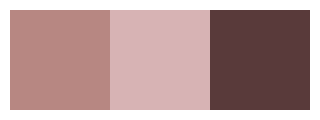

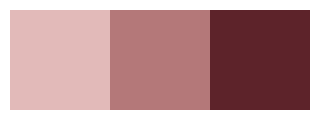

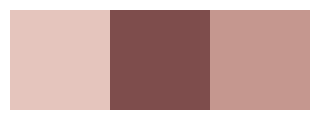

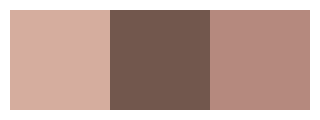

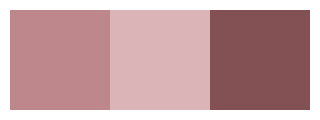

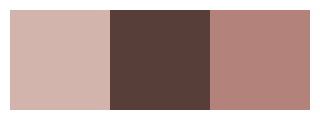

In [ ]:
for folder in seasons:
    this_df = pd.DataFrame(columns=['H', 'S', 'V', 'L', 'A', 'B', 'C', 'M', 'Y', 'K', 'label'])
    
    for file in os.listdir(os.path.join(data_root, folder)):
        full_path = os.path.join(data_root, folder, file)
        
        palette = pc.create_palette(full_path)
        
        if palette is None:
            continue
        
        cmyk_palette = bgr2cmyk(palette)
        
        palette = np.array([palette], np.uint8)
        hsv_palette = cv2.cvtColor(palette, cv2.COLOR_BGR2HSV)
        lab_palette = cv2.cvtColor(palette, cv2.COLOR_BGR2LAB)
    
        mean_hsv = np.mean(hsv_palette, axis=1)[0]
        mean_lab = np.mean(lab_palette, axis=1)[0]
        mean_cmyk = np.mean(cmyk_palette, axis=0)
        
        row = np.concatenate((mean_hsv, mean_lab, mean_cmyk)).tolist()
        row.append(folder)
        this_df.loc[len(this_df)] = row
        
    print(f'{folder}: {len(this_df)} rows')
    this_df.to_csv(f'images/dataset/mean_{folder}.csv', index=False)

In [ ]:
df = pd.DataFrame(columns=['H', 'S', 'V', 'L', 'A', 'B', 'C', 'M', 'Y', 'K', 'label'])

for folder in seasons:
    this_df = pd.read_csv(f'images/dataset/mean_{folder}.csv')
    df = pd.concat([df, this_df], ignore_index=True)

df.to_csv('images/dataset/mean.csv', index=False)

/var/folders/yr/jd3hph_53llgn3rcd194plzc0000gp/T/ipykernel_55397/2464222809.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, this_df], ignore_index=True)


In [ ]:
print(f'Finished creating dataset for {len(df)} images')

Finished creating dataset for 402 images


In [ ]:
spring_df = pd.read_csv('images/dataset/mean_spring.csv')
summer_df = pd.read_csv('images/dataset/mean_summer.csv')
fall_df = pd.read_csv('images/dataset/mean_fall.csv')
winter_df = pd.read_csv('images/dataset/mean_winter.csv')

In [ ]:
print(f'Spring: {len(spring_df)}')
print(f'Summer: {len(summer_df)}')
print(f'Fall: {len(fall_df)}')
print(f'Winter: {len(winter_df)}')

Spring: 97
Summer: 108
Fall: 103
Winter: 94


In [ ]:
spring_df.head(10)

,H,S,V,L,A,B,C,M,Y,K,label
0,5.666667,74.666667,171.000000,148.666667,141.333333,138.000000,0.0,60.645318,74.628952,0.329412,spring
1,62.000000,72.333333,185.666667,158.000000,145.000000,137.000000,0.0,67.392063,71.337572,0.271895,spring
2,9.666667,99.000000,154.666667,131.666667,139.666667,142.666667,0.0,67.699582,99.188275,0.393464,spring
3,10.333333,79.333333,191.000000,169.000000,138.666667,143.333333,0.0,51.495968,79.386449,0.250980,spring
4,8.666667,81.000000,204.000000,176.666667,142.666667,143.333333,0.0,60.452448,81.162861,0.200000,spring
5,8.333333,99.000000,157.333333,134.000000,141.000000,142.333333,0.0,72.327552,98.608453,0.383007,spring
6,7.666667,82.333333,172.333333,149.000000,140.666667,141.000000,0.0,63.741172,82.381239,0.324183,spring
7,9.333333,98.666667,150.666667,129.000000,140.000000,142.666667,0.0,68.981998,98.510113,0.409150,spring
8,8.000000,107.333333,154.666667,128.666667,143.333333,143.000000,0.0,78.339025,107.328451,0.393464,spring
9,8.333333,84.333333,161.333333,141.333333,139.000000,140.000000,0.0,62.842845,84.215436,0.367320,spring


In [ ]:
spring_df.describe()

,H,S,V,L,A,B,C,M,Y,K
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.000000
mean,13.274914,88.219931,169.810997,146.360825,141.161512,141.539519,0.0,65.823794,88.076763,0.334075
std,19.542097,16.401705,17.755014,17.057818,2.487056,3.849736,0.0,11.322955,16.588065,0.069628
min,3.000000,51.000000,110.333333,87.000000,135.333333,132.333333,0.0,40.538258,51.094327,0.149020
25%,6.666667,79.000000,158.666667,136.333333,139.333333,139.000000,0.0,57.940908,78.943860,0.283660
50%,8.666667,86.000000,169.000000,143.666667,141.000000,141.666667,0.0,64.675750,86.116680,0.337255
75%,10.333333,100.000000,182.666667,158.000000,143.333333,143.333333,0.0,73.380191,99.917318,0.377778
max,119.000000,135.333333,217.000000,184.666667,147.333333,151.666667,0.0,97.332567,135.451829,0.567320


In [ ]:
summer_df.head(10)

,H,S,V,L,A,B,C,M,Y,K,label
0,4.000000,74.666667,179.666667,155.666667,142.000000,137.000000,0.0,64.797317,74.839934,0.295425,summer
1,7.000000,67.000000,169.666667,151.333333,139.333333,138.000000,0.0,53.067638,67.103301,0.334641,summer
2,5.000000,76.666667,154.666667,135.333333,140.333333,137.000000,0.0,65.206794,76.772167,0.393464,summer
3,6.000000,70.000000,191.666667,167.333333,141.666667,138.666667,0.0,56.728067,70.449940,0.248366,summer
4,6.333333,84.666667,151.666667,130.666667,141.000000,139.666667,0.0,68.766525,84.631821,0.405229,summer
5,6.000000,73.333333,157.333333,138.000000,140.000000,137.333333,0.0,59.767384,73.282535,0.383007,summer
6,11.333333,75.666667,165.333333,150.000000,135.666667,141.333333,0.0,48.604845,75.383320,0.351634,summer
7,7.666667,82.333333,172.333333,149.666667,140.666667,140.666667,0.0,62.632915,82.340306,0.324183,summer
8,9.333333,87.666667,162.666667,141.666667,139.333333,141.666667,0.0,61.292003,87.810297,0.362092,summer
9,10.333333,102.333333,151.333333,129.666667,140.333333,144.666667,0.0,69.044148,102.241453,0.406536,summer


In [ ]:
summer_df.describe()

,H,S,V,L,A,B,C,M,Y,K
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.0,108.000000,108.000000,108.000000
mean,18.132716,75.194444,167.953704,147.416667,140.444444,138.339506,0.0,60.450136,74.849425,0.341358
std,26.285790,15.225281,13.699145,13.349766,2.041623,3.558145,0.0,9.598055,15.602975,0.053722
min,1.333333,41.333333,131.333333,112.333333,130.333333,131.333333,0.0,21.889454,40.624866,0.188235
25%,5.583333,63.916667,159.250000,139.666667,139.333333,135.583333,0.0,54.674634,63.872795,0.311111
50%,7.333333,75.666667,166.666667,147.000000,140.666667,138.333333,0.0,61.412328,75.602958,0.346405
75%,9.833333,85.333333,175.666667,155.666667,141.666667,141.000000,0.0,67.917576,85.508249,0.375490
max,120.000000,110.333333,207.000000,182.000000,144.333333,147.000000,0.0,77.015663,110.452062,0.484967


In [ ]:
fall_df.head(10)

,H,S,V,L,A,B,C,M,Y,K,label
0,8.000000,68.000000,179.000000,160.666667,139.000000,139.000000,0.0,51.548842,67.898037,0.298039,fall
1,10.333333,90.333333,154.333333,135.000000,138.666667,142.000000,0.0,61.770735,90.383822,0.394771,fall
2,11.666667,99.333333,162.666667,141.333333,138.666667,145.000000,0.0,62.847532,99.214014,0.362092,fall
3,8.333333,97.666667,157.666667,133.666667,142.000000,142.666667,0.0,70.844404,97.632279,0.381699,fall
4,8.333333,97.000000,166.333333,140.333333,143.000000,143.666667,0.0,71.223795,97.065354,0.347712,fall
5,2.000000,52.333333,166.333333,150.666667,139.000000,133.333333,0.0,48.724536,52.490334,0.347712,fall
6,9.000000,140.333333,138.333333,107.666667,145.333333,148.333333,0.0,100.470638,140.286930,0.457516,fall
7,9.000000,61.000000,177.333333,162.000000,136.000000,137.666667,0.0,43.693412,60.845649,0.304575,fall
8,10.666667,95.000000,170.666667,148.666667,139.333333,143.666667,0.0,61.885507,95.323620,0.330719,fall
9,8.000000,101.333333,158.666667,131.333333,143.333333,143.666667,0.0,74.628663,101.256745,0.377778,fall


In [ ]:
fall_df.describe()

,H,S,V,L,A,B,C,M,Y,K
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.0,103.000000,103.000000,103.000000
mean,8.469256,92.656958,162.297735,139.466019,140.893204,142.346278,0.0,67.064144,92.639322,0.363538
std,2.163994,17.066093,12.877749,12.735224,2.368187,3.644891,0.0,10.789631,17.028995,0.050501
min,2.000000,52.333333,129.333333,107.666667,135.333333,133.333333,0.0,43.693412,52.490334,0.236601
25%,7.166667,80.833333,153.833333,131.666667,139.166667,139.666667,0.0,59.805463,80.857216,0.330719
50%,8.666667,91.000000,162.000000,140.333333,140.666667,142.333333,0.0,66.123060,91.106478,0.364706
75%,10.000000,102.333333,170.666667,148.166667,142.500000,144.333333,0.0,74.896012,102.284615,0.396732
max,13.333333,140.666667,194.666667,165.333333,147.000000,154.333333,0.0,100.470638,140.774031,0.492810


In [ ]:
winter_df.head(10)

,H,S,V,L,A,B,C,M,Y,K,label
0,6.333333,89.333333,148.666667,127.333333,141.000000,139.666667,0.0,72.555575,89.651005,0.416993,winter
1,3.333333,74.333333,171.333333,146.666667,144.000000,137.333333,0.0,68.076298,74.371250,0.328105,winter
2,3.666667,65.666667,184.000000,161.666667,141.666667,136.666667,0.0,58.370617,65.717587,0.278431,winter
3,7.666667,125.000000,151.000000,118.333333,146.666667,147.666667,0.0,94.027841,125.136015,0.407843,winter
4,6.333333,47.666667,197.666667,182.333333,137.000000,135.666667,0.0,38.039395,47.603724,0.224837,winter
5,67.333333,40.000000,186.666667,179.000000,132.333333,133.333333,0.0,23.071943,38.540258,0.267974,winter
6,3.666667,81.333333,163.333333,137.666667,143.333333,137.333333,0.0,72.593274,81.435006,0.359477,winter
7,8.666667,73.666667,155.333333,139.666667,137.333333,138.666667,0.0,53.531285,73.904585,0.390850,winter
8,116.666667,62.666667,161.666667,142.000000,142.666667,131.000000,0.0,62.948880,57.181885,0.366013,winter
9,7.000000,79.666667,167.333333,146.000000,141.000000,140.000000,0.0,63.951489,79.516246,0.343791,winter


In [ ]:
winter_df.describe()

,H,S,V,L,A,B,C,M,Y,K
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0,94.000000,94.000000,94.000000
mean,31.081560,70.918440,171.163121,150.858156,140.666667,137.507092,0.0,58.921536,70.190419,0.328772
std,48.128976,16.080197,14.183871,14.802442,2.799556,3.788850,0.0,12.331023,16.451486,0.055623
min,0.666667,35.333333,132.333333,118.333333,132.333333,130.000000,0.0,23.071943,32.798543,0.197386
25%,5.333333,61.333333,163.000000,142.583333,139.083333,134.333333,0.0,50.640562,58.163568,0.295752
50%,7.666667,71.333333,171.000000,151.166667,141.000000,137.333333,0.0,59.242327,69.104455,0.329412
75%,47.250000,81.333333,179.583333,160.250000,142.333333,140.250000,0.0,65.395277,81.303083,0.360784
max,178.333333,125.000000,204.666667,182.333333,149.666667,147.666667,0.0,96.388334,125.136015,0.481046


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('images/dataset/mean_shuffled.csv', index=False)

In [ ]:
df.head(10)

,H,S,V,L,A,B,C,M,Y,K,label
0,8.333333,97.666667,157.666667,133.666667,142.000000,142.666667,0.0,70.844404,97.632279,0.381699,fall
1,118.666667,72.000000,159.666667,140.666667,142.333333,132.000000,0.0,71.246694,63.307304,0.373856,winter
2,7.333333,71.000000,158.000000,139.666667,139.000000,138.000000,0.0,54.558979,71.160311,0.380392,summer
3,4.666667,88.333333,170.000000,145.000000,142.000000,137.666667,0.0,74.094046,88.357131,0.333333,spring
4,6.666667,68.333333,177.000000,155.000000,140.333333,138.666667,0.0,53.830104,68.238778,0.305882,spring
5,8.666667,80.666667,178.000000,155.666667,140.333333,141.666667,0.0,58.097799,80.552303,0.301961,spring
6,5.333333,67.666667,157.333333,140.333333,139.333333,136.333333,0.0,57.709567,67.721526,0.383007,fall
7,11.666667,72.000000,180.666667,164.000000,136.333333,142.333333,0.0,44.692324,72.014737,0.291503,spring
8,7.000000,82.666667,162.666667,140.666667,140.333333,139.333333,0.0,65.195631,82.662336,0.362092,fall
9,5.666667,79.666667,165.000000,142.666667,142.000000,138.666667,0.0,65.864472,79.554642,0.352941,summer


In [ ]:
print('all seasons:', len(df))

all seasons: 402


In [ ]:
def warm_cool(df):
    df_copy = df.copy()
    df_copy['label'] = df_copy['label'].apply(lambda x: 'warm' if (x == 'spring' or x == 'fall') else 'cool')
    
    df_copy.to_csv('images/dataset/mean_shuffled_wc.csv', index=False)
    print(len(df_copy))

In [ ]:
warm_cool(df)

402


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
df['label'] = le.fit_transform(df['label'])

In [ ]:
df

,H,S,V,L,A,B,C,M,Y,K,label
0,8.333333,97.666667,157.666667,133.666667,142.000000,142.666667,0.0,70.844404,97.632279,0.381699,0
1,118.666667,72.000000,159.666667,140.666667,142.333333,132.000000,0.0,71.246694,63.307304,0.373856,3
2,7.333333,71.000000,158.000000,139.666667,139.000000,138.000000,0.0,54.558979,71.160311,0.380392,2
3,4.666667,88.333333,170.000000,145.000000,142.000000,137.666667,0.0,74.094046,88.357131,0.333333,1
4,6.666667,68.333333,177.000000,155.000000,140.333333,138.666667,0.0,53.830104,68.238778,0.305882,1
...,...,...,...,...,...,...,...,...,...,...,...
397,6.333333,103.666667,156.666667,128.666667,145.000000,142.666667,0.0,83.067656,103.661457,0.385621,1
398,60.000000,57.000000,190.333333,167.333333,142.666667,134.000000,0.0,56.608374,56.311671,0.253595,2
399,13.000000,100.000000,156.333333,136.333333,137.666667,145.000000,0.0,57.940908,99.917318,0.386928,1
400,8.000000,101.333333,158.666667,131.333333,143.333333,143.666667,0.0,74.628663,101.256745,0.377778,0


In [ ]:
corr = df.corr()

In [ ]:
corr['label'].sort_values(ascending=False)

label    1.000000
H        0.268311
L        0.261693
V        0.184494
A       -0.064731
K       -0.184494
M       -0.288768
B       -0.467588
S       -0.472530
Y       -0.478373
C             NaN
Name: label, dtype: float64

In [ ]:
df[df['label'] == 0].median()

H          8.666667
S         91.000000
V        162.000000
L        140.333333
A        140.666667
B        142.333333
C          0.000000
M         66.123060
Y         91.106478
K          0.364706
label      0.000000
dtype: float64

In [ ]:
df[df['label'] == 1].median()

H          8.666667
S         86.000000
V        169.000000
L        143.666667
A        141.000000
B        141.666667
C          0.000000
M         64.675750
Y         86.116680
K          0.337255
label      1.000000
dtype: float64

In [ ]:
df[df['label'] == 2].median()

H          7.333333
S         75.666667
V        166.666667
L        147.000000
A        140.666667
B        138.333333
C          0.000000
M         61.412328
Y         75.602958
K          0.346405
label      2.000000
dtype: float64

In [ ]:
df[df['label'] == 3].median()

H          7.666667
S         71.333333
V        171.000000
L        151.166667
A        141.000000
B        137.333333
C          0.000000
M         59.242327
Y         69.104455
K          0.329412
label      3.000000
dtype: float64